In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from nltk.tokenize import sent_tokenize 
import nltk
nltk.download('punkt')

In [16]:
data = pd.read_csv('data/coursera-courses.csv', encoding='latin-1',sep=",")

data.columns


Index(['course_url', 'course_name', 'learning_product_type',
       'course_provided_by', 'course_rating', 'course_rated_by',
       'enrolled_student_count', 'course_difficulty', 'skills', 'description',
       'percentage_of_new_career_starts',
       'percentage_of_pay_increase_or_promotion', 'estimated_time_to_complete',
       'instructors'],
      dtype='object')

In [18]:
import pandas as pd

# Assuming 'data' is your DataFrame
data_columns = data.columns
relevant_columns = ['course_provided_by', 'learning_product_type', 'course_difficulty', 'course_name', 'estimated_time_to_complete', 'instructors', 'description']
data = data[relevant_columns]


In [19]:
data.head(2)

,course_provided_by,learning_product_type,course_difficulty,course_name,estimated_time_to_complete,instructors,description
0,IBM,PROFESSIONAL CERTIFICATE,Beginner,IBM Data Science,10 months,"['Joseph Santarcangelo', 'Alex Aklson', 'Rav A...",Data Science has been ranked as one of the hot...
1,IBM,SPECIALIZATION,Beginner,Introduction to Data Science,4 months,"['Alex Aklson', 'Rav Ahuja', 'Romeo Kienzler',...",In this Specialization learners will develop f...


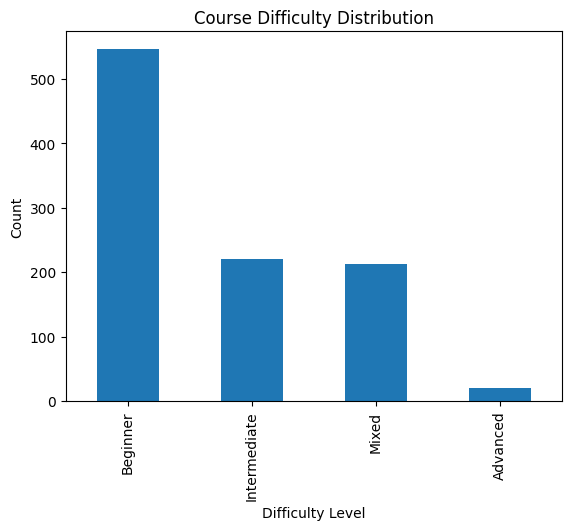

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting a bar chart for 'course_difficulty'
course_difficulty_counts = data['course_difficulty'].value_counts()
course_difficulty_counts.plot(kind='bar', title='Course Difficulty Distribution', xlabel='Difficulty Level', ylabel='Count')
plt.show()



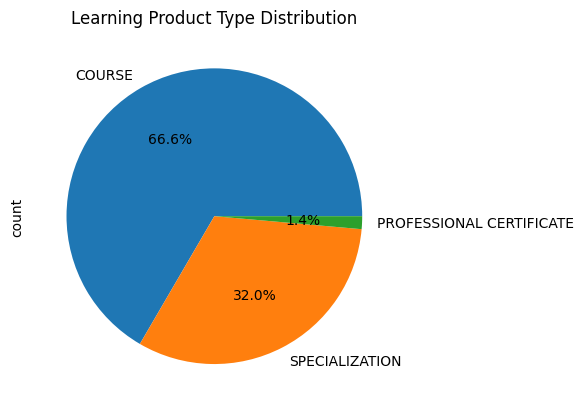

In [23]:
# Plotting a pie chart for 'learning_product_type'
learning_product_type_counts = data['learning_product_type'].value_counts()
learning_product_type_counts.plot(kind='pie', title='Learning Product Type Distribution', autopct='%1.1f%%')
plt.show()


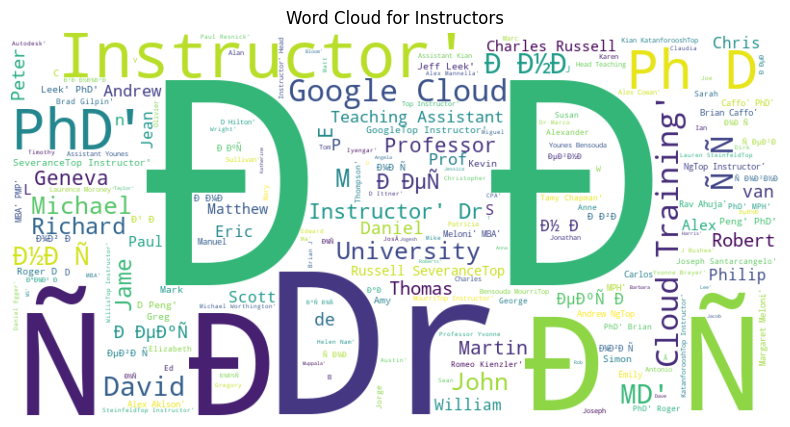

In [26]:
from wordcloud import WordCloud

# Generate a word cloud for 'instructors'
instructors_text = ' '.join(data['instructors'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(instructors_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Instructors')
plt.show()


In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



# Combine relevant columns into a single feature column for TF-IDF
data['combined_features'] = data['course_provided_by'] + ' ' + data['learning_product_type'] + ' ' + data['course_difficulty']

# Create a TfidfVectorizer to convert the combined features into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_features'].fillna(''))

# Calculate cosine similarity
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get content-based recommendations
def user_based_content_recommendations(user_input):
    # Create a new DataFrame with the user's input
    user_data = pd.DataFrame([user_input], columns=['course_provided_by', 'learning_product_type', 'course_difficulty'])

    # Combine user input into a single feature column
    user_data['combined_features'] = user_data['course_provided_by'] + ' ' + user_data['learning_product_type'] + ' ' + user_data['course_difficulty']

    # Convert user input into TF-IDF features
    user_tfidf_matrix = tfidf_vectorizer.transform(user_data['combined_features'].fillna(''))

    # Calculate cosine similarity between user input and all courses
    user_cosine_similarities = linear_kernel(user_tfidf_matrix, tfidf_matrix)

    # Get the indices of courses sorted by similarity
    sim_indices = user_cosine_similarities.argsort()[0][::-1][1:6]

    # Return the top 5 recommended courses
    return data.iloc[sim_indices][['course_name', 'estimated_time_to_complete', 'instructors', 'description']]

# Example usage with user input
user_input = {'course_provided_by': 'Coursera', 'learning_product_type': 'Course', 'course_difficulty': 'Intermediate'}
recommendations = user_based_content_recommendations(user_input)

# Function to print formatted recommendations
def print_formatted_recommendations(recommendations):
    print("\nTop 5 Recommended Courses:")
    print("=" * 50)
    for i, (index, row) in enumerate(recommendations.iterrows(), start=1):
        print(f"{i}. Course Name: {row['course_name']}")
        print(f"   Estimated Time to Complete: {row['estimated_time_to_complete']}")
        print(f"   Instructors: {row['instructors']}")
        print(f"   Description: {row['description']}\n")
    print("=" * 50)

# Example usage with user input
user_input = {'course_provided_by': 'Coursera', 'learning_product_type': 'Course', 'course_difficulty': 'Intermediate'}
recommendations = user_based_content_recommendations(user_input)

# Print the formatted recommendations
print_formatted_recommendations(recommendations)

recommendations.head()


Top 5 Recommended Courses:
1. Course Name: The Oral Cavity: Portal to Health and Disease
   Estimated Time to Complete: 11 hours
   Instructors: ['Dr. Thomas P. Sollecito', 'Dr. Eric Stoopler', 'Dr. Uri Hangorsky']
   Description: This course will focus on the interprofessional realtionship of dentistry and medicine. For each session, the medical specialist will present a broad overview of specific disease entity which will be followed by a dental educator discussing the relevant oral manifestations and implications. The final module of each session will be devoted to the interaction between the dental and  other health care professionals.

2. Course Name: Wonders of Ancient Egypt
   Estimated Time to Complete: 9 hours
   Instructors: ['David P. Silverman']
   Description: Colossal pyramids, imposing temples, golden treasures, enigmatic hieroglyphs, powerful pharaohs, strange gods, and mysterious mummies are features of Ancient Egyptian culture that have fascinated people over the mil

,course_name,estimated_time_to_complete,instructors,description
612,The Oral Cavity: Portal to Health and Disease,11 hours,"['Dr. Thomas P. Sollecito', 'Dr. Eric Stoopler...",This course will focus on the interprofessiona...
898,Wonders of Ancient Egypt,9 hours,['David P. Silverman'],"Colossal pyramids, imposing temples, golden tr..."
737,"Leading for Equity, Diversity and Inclusion in...",16 hours,['Dr. John C. Burkhardt '],This course is open to professionals intereste...
944,Python Classes and Inheritance,17 hours,"['Steve Oney', 'Paul Resnick']","This course introduces classes, instances, and..."
846,Data Collection and Processing with Python,16 hours,"['Paul Resnick', 'Jaclyn Cohen']",This course teaches you to fetch and process d...
